# Open Data Hackathon - Klimanotstand Konstanz



In [295]:
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure

## Load in data



/tmp/ipykernel_1073/147338700.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfUmfrage=pd.read_csv('../data/Open Data_Ergebnisse_Klimaschutzdaten_fuer_Konstanz.csv',error_bad_lines=False,sep=";")


spalten:  Index(['ID', 'KL1', 'KL2', 'KL3', 'KL3a', 'DB1', 'DB2', 'DB3*', 'DB4', 'DB5',
       'DB6', 'DB7*', 'DB8', 'KS1', 'KS2', 'KS3', 'DV1', 'DV2', 'Zsmarbeit',
       'Interesse', 'Position'],
      dtype='object')
spalten anzahl:  21
---------------
[4. 5. 3. 1.]
[1. 2.]
[1. 2. 3.]
hier:  1.0    25
2.0    22
Name: KL2, dtype: int64


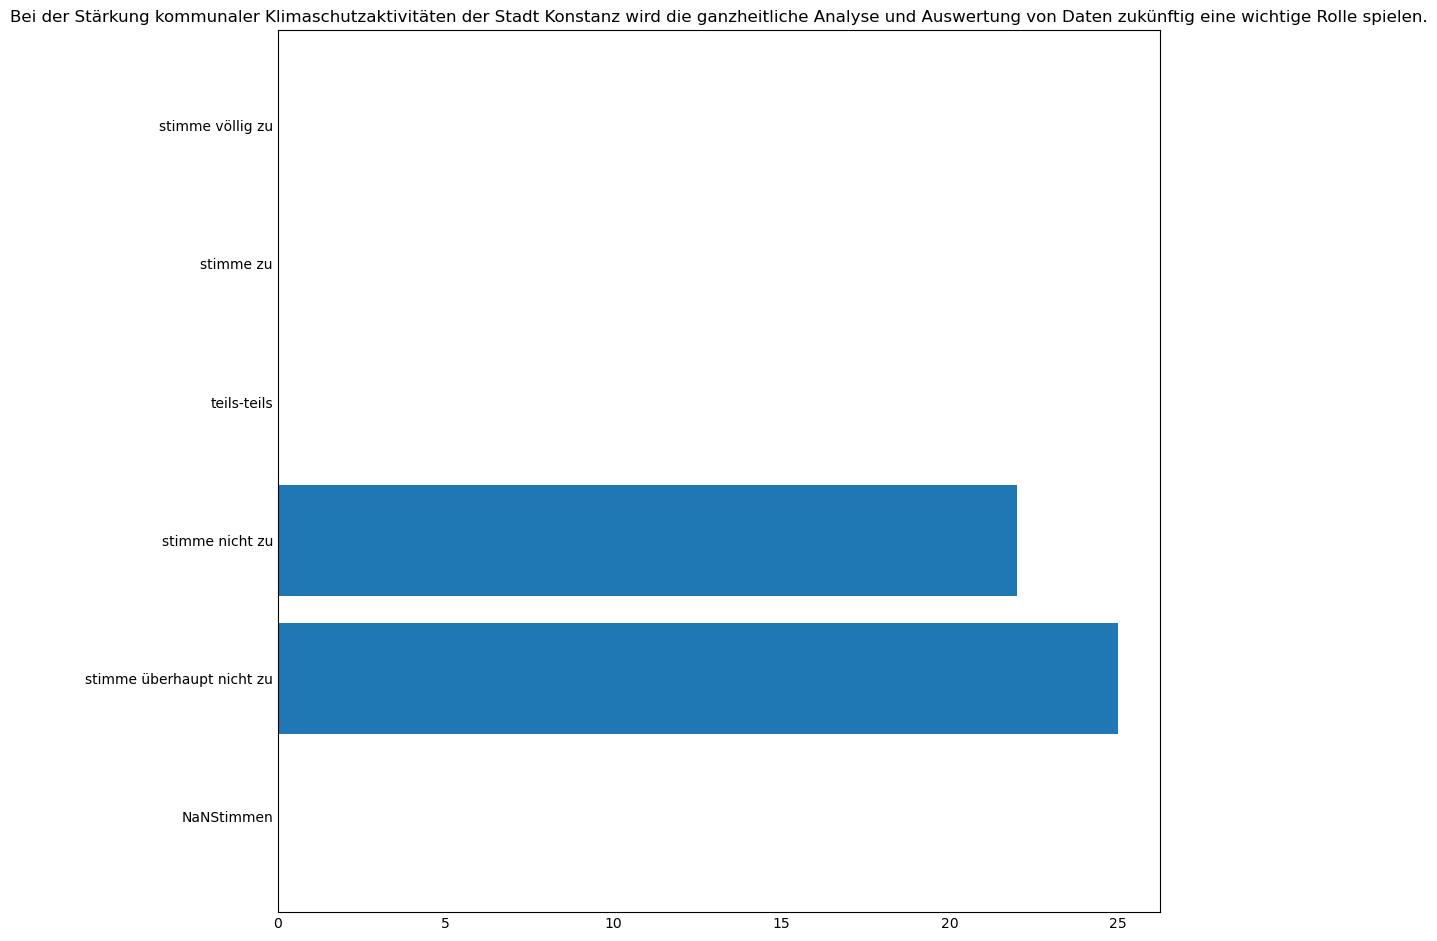

In [296]:

pathBusverkehr = r'../data/Busverkehr'
filesBusverkehr = Path(pathBusverkehr).glob('*.csv')

file_namesBusverkehr=[]
for i in filesBusverkehr:
    file_namesBusverkehr.append(i)

dfBusverkehr=pd.read_csv(file_namesBusverkehr[1],sep=";")
dfBusverkehr.LINIE.unique()


dfUmfrage=pd.read_csv('../data/Open Data_Ergebnisse_Klimaschutzdaten_fuer_Konstanz.csv',error_bad_lines=False,sep=";")

print("spalten: ",dfUmfrage.columns)
print("spalten anzahl: ",len(dfUmfrage.columns))


#print(dfUmfrage)

#pd.read_csv("../data/Busverkehr/2019_FAHRPLAENE.csv",sep=";")
#pd.read_csv("..")

#dropping row 47 and 48 because there are only nan values and irrelevant
dfUmfrage=dfUmfrage[:-2]
dfUmfrage.fillna(0)


print("---------------")
print(dfUmfrage.KL1.unique())
print(dfUmfrage.KL2.unique())
print(dfUmfrage.KL3.unique())

print("hier: ",dfUmfrage.KL2.value_counts())

x=[0,1,2,3,4,5]
y=[0,dfUmfrage.KL2.value_counts()[1],dfUmfrage.KL2.value_counts()[2],0,0,0]

#plt.bar(x, y,label=[0,1,2,3,4,5]) 
#plt.ylabel('Anzahl Stimmen') 
#figure(figsize=(1,1), dpi=100)
#plt.xlabel('Stimme: 1')
#plt.show()

# Create data

x = ("NaNStimmen","stimme überhaupt nicht zu","stimme nicht zu","teils-teils","stimme zu","stimme völlig zu")

 
# Create bars
#plt.barh(y=x, width=y)
 
# Rotation of the bar names
#plt.xticks(x, bars, rotation=90)
 
# Custom the subplot layout
#plt.subplots_adjust(bottom=0.4, top=0.99)

fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(9,9)

ax.set_title('Bei der Stärkung kommunaler Klimaschutzaktivitäten der Stadt Konstanz wird die ganzheitliche Analyse und Auswertung von Daten zukünftig eine wichtige Rolle spielen.')
ax.barh(y=x, width=y)

# Show graphic
plt.show()








# def plot(df,stimmenZahl):





#dfKS1
#dfKS2
#dfKS3
#print("das ist index: ")


In [297]:
#print(dfUmfrage.KL1.value_counts())


#x = ("NaNStimmen","stimme überhaupt nicht zu","stimme nicht zu","teils-teils","stimme zu","stimme völlig zu")


def plot(df,stimmen,titel):
    print("das sind die vorkommenden stimmen: ",df.value_counts())
    x=stimmen
    y=[]
    for i in range(6):
        try:
            y.append(df.value_counts()[i])
        except:
            y.append(0)
    fig, ax = plt.subplots()
    fig.set_size_inches(9,9) # Fig size
    ax.set_title(titel)
    ax.barh(y=x, width=y)
    plt.show()
    #plt.savefig('my_plot.png')





#y=[0,dfUmfrage.KL1.value_counts()[1],0,dfUmfrage.KL1.value_counts()[3],dfUmfrage.KL1.value_counts()[4],dfUmfrage.KL1.value_counts()[5]]

#x = ("NaNStimmen","stimme überhaupt nicht zu","stimme nicht zu","teils-teils","stimme zu","stimme völlig zu")







#ax.set_title('Bei der Stärkung kommunaler Klimaschutzaktivitäten der Stadt Konstanz nimmt die ganzheitliche Analyse und Auswertung von Daten bereits eine wichtige Rolle ein. ')


# Show graphic
#plt.show()





das sind die vorkommenden stimmen:  5.0    28
4.0    14
3.0     4
1.0     1
Name: KL1, dtype: int64


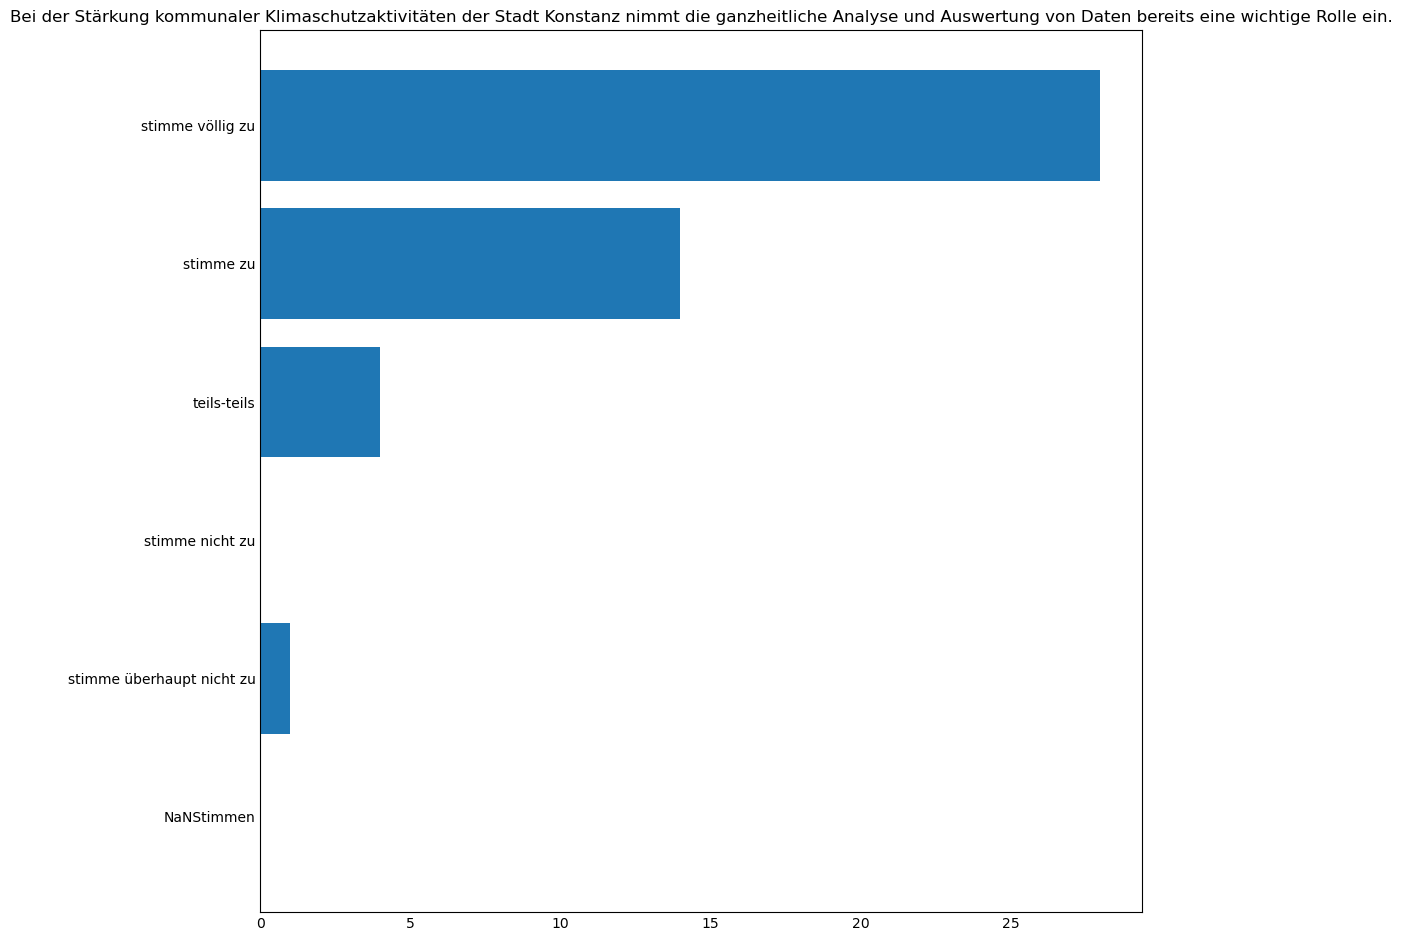

das sind die vorkommenden stimmen:  1.0    25
2.0    22
Name: KL2, dtype: int64


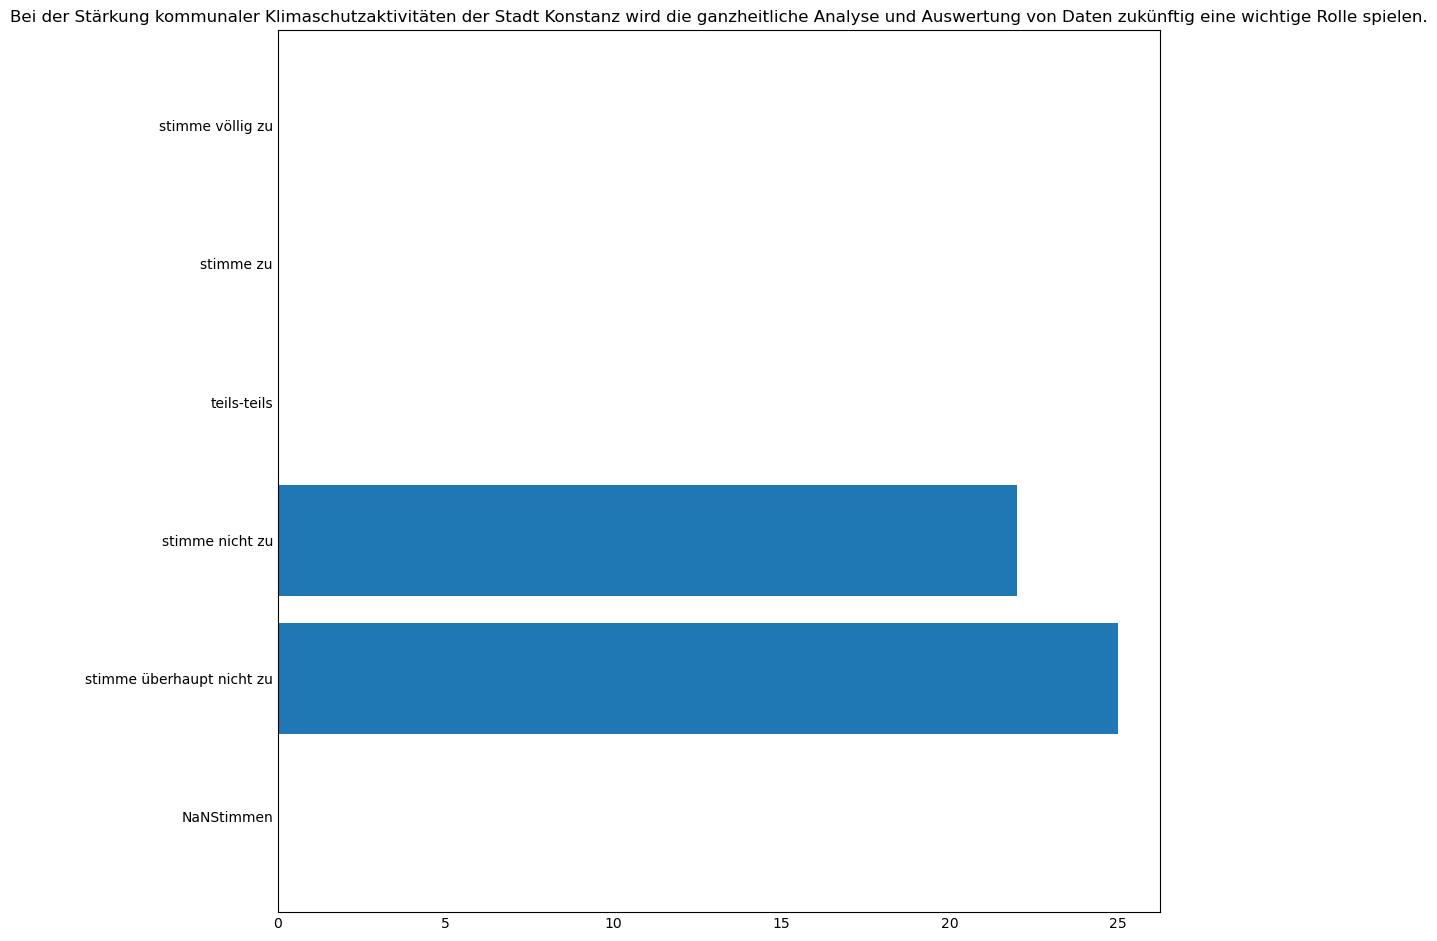

das sind die vorkommenden stimmen:  1.0    39
2.0     5
3.0     3
Name: KL3, dtype: int64


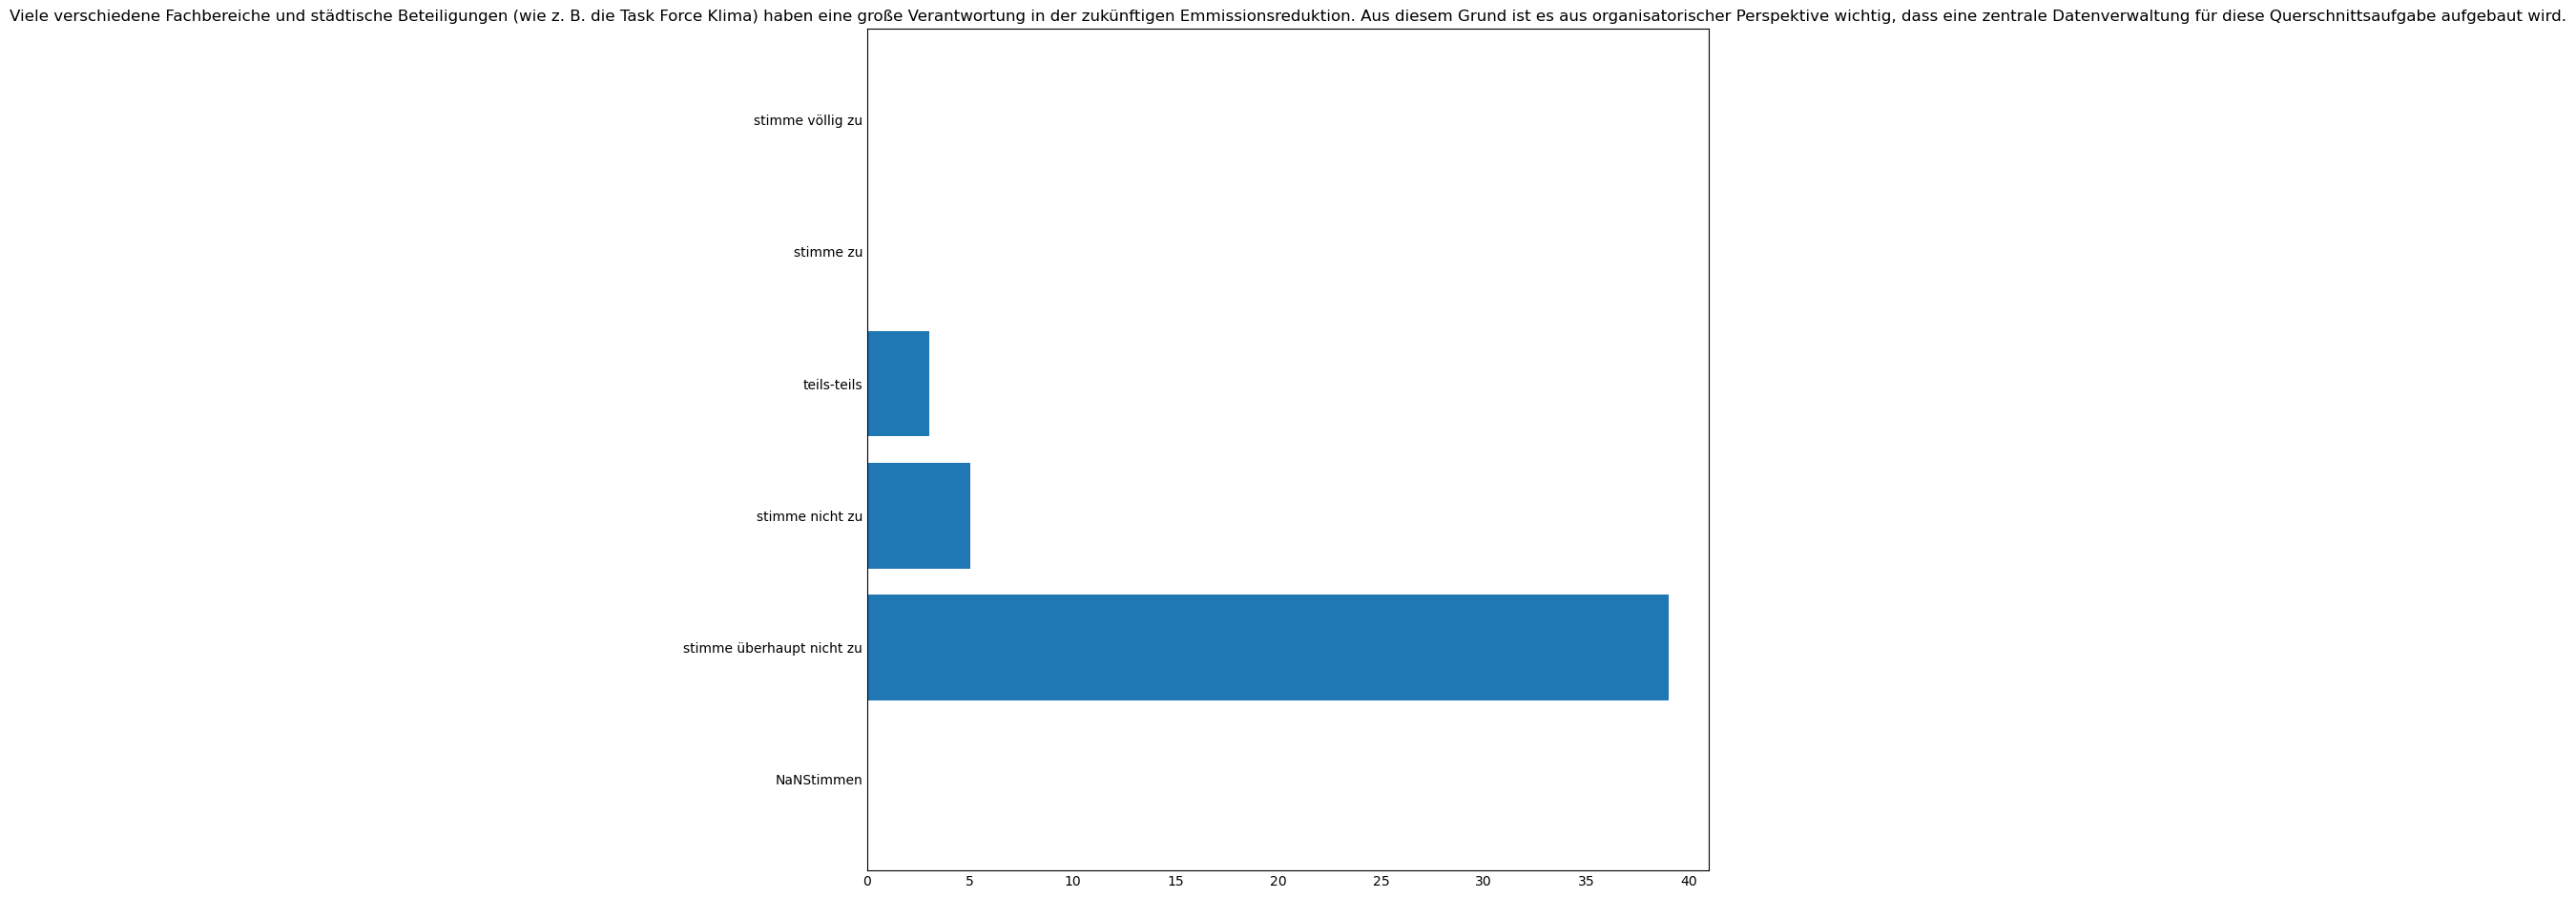

In [298]:
stimmen = ("NaNStimmen","stimme überhaupt nicht zu","stimme nicht zu","teils-teils","stimme zu","stimme völlig zu")
plot(dfUmfrage.KL1,x,'Bei der Stärkung kommunaler Klimaschutzaktivitäten der Stadt Konstanz nimmt die ganzheitliche Analyse und Auswertung von Daten bereits eine wichtige Rolle ein.')
plot(dfUmfrage.KL2,x,'Bei der Stärkung kommunaler Klimaschutzaktivitäten der Stadt Konstanz wird die ganzheitliche Analyse und Auswertung von Daten zukünftig eine wichtige Rolle spielen.')
plot(dfUmfrage.KL3,x,'Viele verschiedene Fachbereiche und städtische Beteiligungen (wie z. B. die Task Force Klima) haben eine große Verantwortung in der zukünftigen Emmissionsreduktion. Aus diesem Grund ist es aus organisatorischer Perspektive wichtig, dass eine zentrale Datenverwaltung für diese Querschnittsaufgabe aufgebaut wird.')

das sind die vorkommenden stimmen:  4.0    24
5.0    11
3.0     9
2.0     2
Name: DB7*, dtype: int64


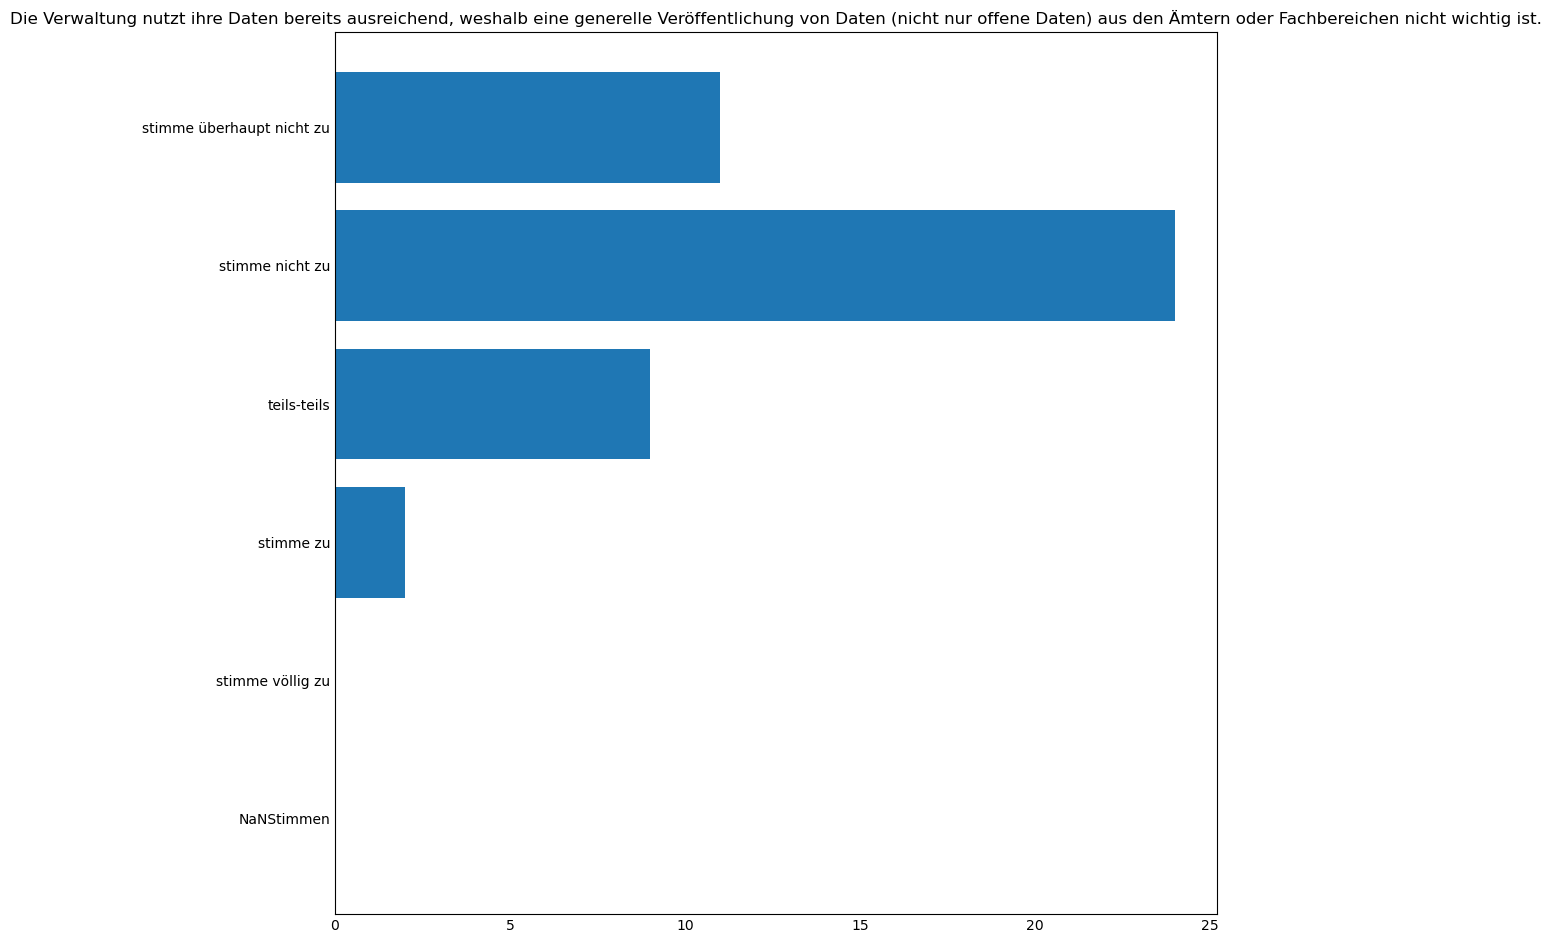

das sind die vorkommenden stimmen:  5.0    31
4.0    11
3.0     4
2.0     1
Name: DB8, dtype: int64


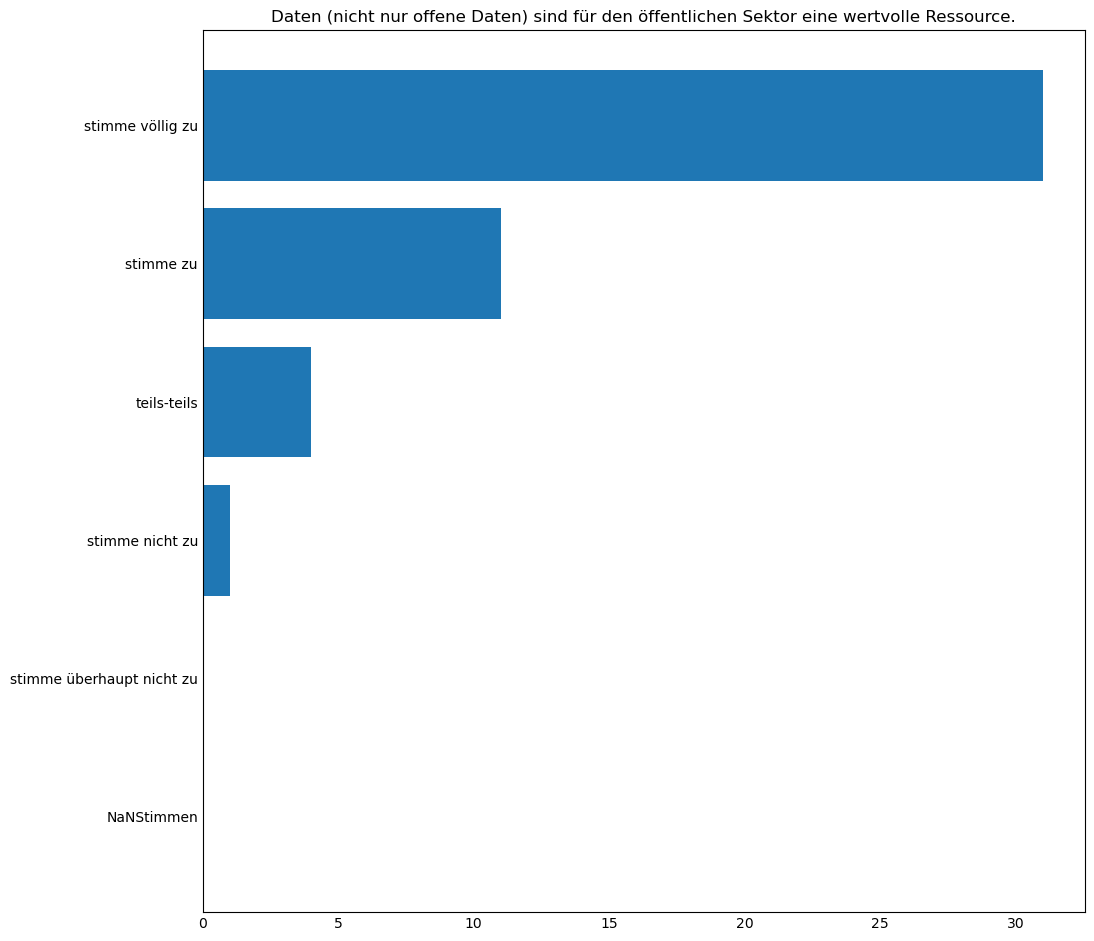

In [299]:
dfUmfrage['DB7*'].value_counts()
stimmenReversed=["NaNStimmen","stimme völlig zu","stimme zu","teils-teils","stimme nicht zu","stimme überhaupt nicht zu"]
titel="Die Verwaltung nutzt ihre Daten bereits ausreichend, weshalb eine generelle Veröffentlichung von Daten (nicht nur offene Daten) aus den Ämtern oder Fachbereichen nicht wichtig ist."
plot(dfUmfrage['DB7*'],stimmenReversed,titel)

DB8="Daten (nicht nur offene Daten) sind für den öffentlichen Sektor eine wertvolle Ressource."
plot(dfUmfrage['DB8'],stimmen,DB8)

In [300]:
import dateutil.parser as parser
import datetime
dfWetter=pd.read_csv('../data/Zaehlstelle_Herose_2021_15min.csv',error_bad_lines=False,sep=",")

#format='%d%m%Y'
#print(dfWetter['Time'].split())

#dfWetter['Time'] = pd.to_datetime(dfWetter['Time'])
#print(dfWetter['Time'] [0])

date_time = parser.parse(dfWetter['Time'][1000] )
#print(type(date_time))
date_time=date_time.date()
print(date_time)

#for count,value in enumerate(dfWetter["Time"]):
    #dfWetter["Time"][count]=parser.parse(dfWetter["Time"][count]).date()

print(dfWetter.Time[0])
print(type(dfWetter.Time[3000]))


#temp=parser.parse(dfWetter.Time[3000])
#temp =dfWetter.Time[3000]
#temp=datetime.datetime.strptime(temp, "%d %m %Y").date()
#print(temp)

dfWetter.Time[1]




2021-01-11
1. Jan. 2021 00:00
<class 'str'>


/tmp/ipykernel_1073/662797012.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dfWetter=pd.read_csv('../data/Zaehlstelle_Herose_2021_15min.csv',error_bad_lines=False,sep=",")


'1. Jan. 2021 00:15'

In [301]:
temp =dfWetter.Time[3000].replace('.', ' ')
temp

print(type(dfWetter.Time))

list=[val for count,val in enumerate(dfWetter.Time)]
for i in list:
    list[i]=list[i].replace(".", "")

print(list[0])
list[0]=list[0].replace(".","")
print(list[0])





<class 'pandas.core.series.Series'>


TypeError: list indices must be integers or slices, not str